In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Առաջադրանք ֊ Համաշխարհային մարաթոնների առաջին տեղերը

    1.  Ցուցադրել ըստ երկրների և սեռերի։
    2.  Որոշեք, թե արդյոք մրցույթի տեղն ազդում է թեստի արդյունքի վրա, եթե այո, ապա որն է լավագույնը վազելու վայրը,     և որն ամենավատը:
    
Առաջադրանքի հղումը՝ http://bit.ly/37RyMpC

In [2]:
df = pd.read_csv("marathon_majors.csv", encoding='latin1')
df

,year,winner,gender,country,time,marathon
0,2018,Dickson Chumba,Male,Kenya,02:05:30,Tokyo
1,2018,Birhane Dibaba,Female,Ethiopia,02:19:51,Tokyo
2,2017,Wilson Kipsang,Male,Kenya,02:03:58,Tokyo
3,2017,Sarah Chepchirchir,Female,Kenya,02:19:47,Tokyo
4,2016,Feyisa Lilesa,Male,Ethiopia,02:06:56,Tokyo
...,...,...,...,...,...,...
531,1978,Mark Stanforth,Male,United States,02:19:20,Chicago
532,1978,Lynae Larson,Female,United States,02:59:25,Chicago
533,1977,Dan Cloeter,Male,United States,02:17:52,Chicago
534,1977,Dorothy Doolittle,Female,United States,02:50:47,Chicago


##  Խմբավորում ենք  ըստ երկրների։

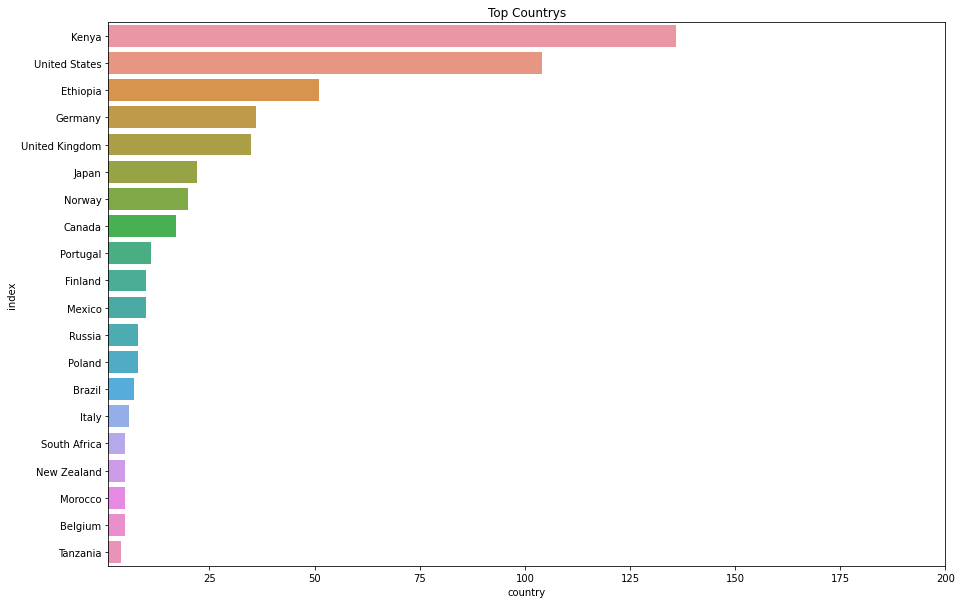

In [3]:
country_df = df.country.value_counts().reset_index()[:20]
country_df
plt.figure(figsize=(15,10))
plt.title("Top Countrys")
sns.barplot(x = "country", y = "index", data=country_df).set_xlim(1, 200)
plt.show()

## Խմբավորում ենք ըստ սեռի

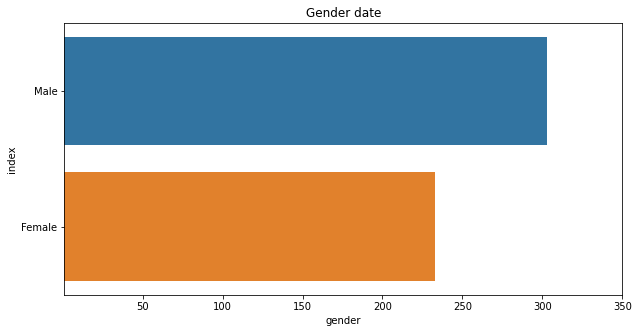

In [4]:
gender_df = df.gender.value_counts().reset_index()

plt.figure(figsize=(10,5))
plt.title("Gender date")
sns.barplot(x = "gender", y = "index", data=gender_df).set_xlim(1, 350)
plt.show()

## Խմբավորում ենք ըստ անցկացման վայրերի

In [5]:
marathon = df.marathon.value_counts().reset_index()
marathon

,index,marathon
0,Boston,175
1,NYC,92
2,Berlin,88
3,Chicago,80
4,London,77
5,Tokyo,24


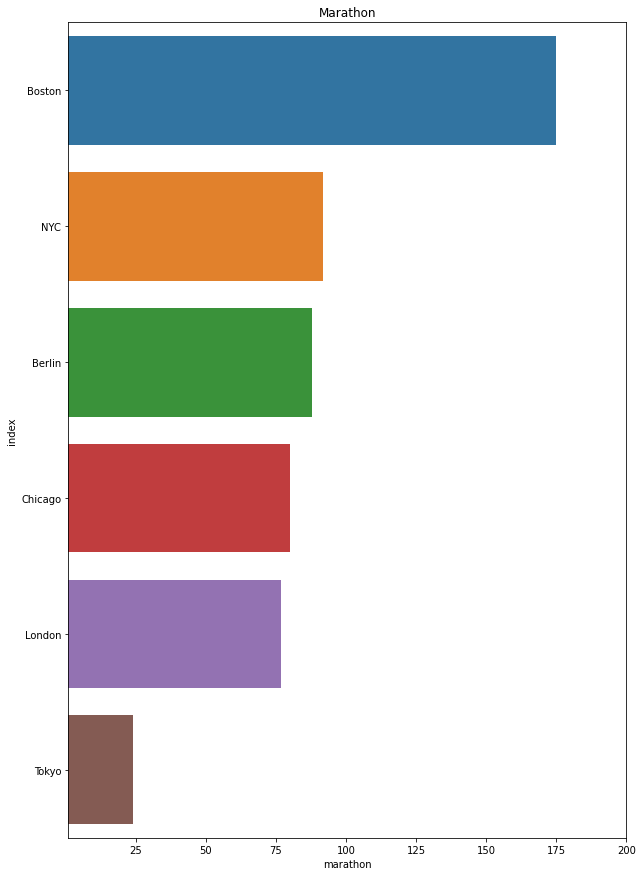

In [6]:
plt.figure(figsize=(10,15))
plt.title("Marathon")
sns.barplot(x = "marathon", y = "index", data=marathon).set_xlim(1, 200)
plt.show()

In [7]:
df["time"]

0      02:05:30
1      02:19:51
2      02:03:58
3      02:19:47
4      02:06:56
         ...   
531    02:19:20
532    02:59:25
533    02:17:52
534    02:50:47
535    02:18:31
Name: time, Length: 536, dtype: object

In [8]:
pd.to_datetime(df["time"])

0     2020-12-31 02:05:30
1     2020-12-31 02:19:51
2     2020-12-31 02:03:58
3     2020-12-31 02:19:47
4     2020-12-31 02:06:56
              ...        
531   2020-12-31 02:19:20
532   2020-12-31 02:59:25
533   2020-12-31 02:17:52
534   2020-12-31 02:50:47
535   2020-12-31 02:18:31
Name: time, Length: 536, dtype: datetime64[ns]

## Խմբավորում ենք ըստ արդյունքների,  տարվա,  հաղթողի, երկրի, սեռի և անցկացման վայրի։

In [9]:
g_df = df.groupby("time")[["year", "winner", "country", "gender", "marathon"]].min()
g_df

,year,winner,country,gender,marathon
time,,,,,
02:02:57,2014,Dennis Kimetto,Kenya,Male,Berlin
02:03:02,2011,Geoffrey Mutai,Kenya,Male,Boston
02:03:03,2016,Kenenisa Bekele,Ethiopia,Male,Berlin
02:03:05,2016,Eliud Kipchoge,Kenya,Male,London
02:03:23,2013,Wilson Kipsang,Kenya,Male,Berlin
...,...,...,...,...,...
03:21:40,1966,Bobbi Gibb,United States,Female,Boston
03:22:01,1974,Jutta von Haase,Germany,Female,Berlin
03:22:46,1969,Sara Mae Berman,United States,Female,Boston


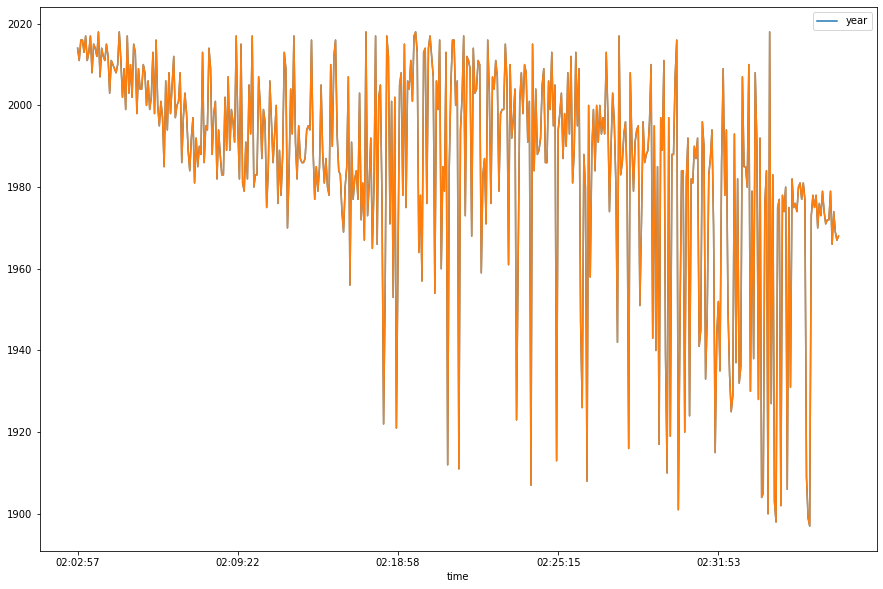

In [10]:
x = g_df["year"]
y = g_df.index
g_df.plot(figsize = (15,10))
plt.plot(y, x)
plt.show()